# Supplemental Figure (PERLOCUSPOSTERIOR):
### More examples of validating the SISTR per-locus method (ABC and LRT) using simulated data

In [1]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Per_locus_validation_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function to plot validation figures
def plot_figure(fig_num, per, opt_allele_list, est_s_dic, errors, s_vals, use_het, use_common, use_bins, num_bins, eps_bins, model, graph_type):
    
    plt.figure(fig_num)
    for opt_allele in opt_allele_list:
            
        # Plot error bars if only plotting one optimal allele
        if len(opt_allele_list) == 1:
            plt.errorbar(s_vals, est_s_dic[opt_allele], marker = 'o', label = str(opt_allele), yerr = errors[opt_allele]) #
            
        else:
            plt.errorbar(s_vals, est_s_dic[opt_allele], marker = 'o', label = str(opt_allele))
    
    if graph_type == 'abc':
        plt.plot( [10**-6,0.2],[10**-6,0.2] )
        plt.ylabel("Posterior estimation of s", size=15) 
        titlename = 'ABC Validation Per ' + str(per)
        filename = PLOTDIR + 'ABC_validation_200/per' + str(per)
        plt.yscale('log')
        
    if graph_type == 'lrt':
        plt.ylabel("Power", size=15) 
        titlename = 'LRT Validation Per ' + str(per)
        filename = PLOTDIR + 'LRT_validation_200/per' + str(per)
    
    plt.xlabel("S value used for simulation", size=15)
    plt.xscale('log')
    plt.xlim(10**-6.5,0.3)
    plt.legend()
   
    opt_allele_string = '_'
    for opt_allele in opt_allele_list:
        opt_allele_string = opt_allele_string + str(opt_allele)
    filename = filename + opt_allele_string
    titlename = titlename + '\nSummary statistics used: '
    if use_het == 'y':
        filename = filename + '_het'
        titlename = titlename + 'Heterozygosity '
    if use_common == 'y':
        filename = filename + '_common'
        titlename = titlename + 'Number_Common_Alleles '
    if use_bins == 'y':
        filename = filename + '_' + str(num_bins) + 'bins' + '_' + str(eps_bins) 
        titlename = titlename + str(num_bins) + '_Allele_Bins '
    
    filename = filename + '_' + model + '.pdf'
    titlename = titlename + '\n' + model 
    plt.title(titlename, size=15)
    plt.savefig(filename, bbox_inches='tight')
    print('Done figure ' + str(fig_num))

In [3]:
# Function to validate ABC and LRT for the per-locus method
def validate(per, opt_allele, s_vals, use_het, use_common, use_bins, num_bins, abc_model, lrt_model, fig_num):
    
    opt_allele_list, s_vals_dic, errors_s_dic, s_vals, p_vals_dic, errors_p_dic, eps_bins, LogLR_vals_dic = validate_per_locus(per, \
    opt_allele, s_vals, use_het, use_common, use_bins, num_bins, abc_model, lrt_model, False, True, False, False) 
    
    #print('s_vals_dic')
    #print(s_vals_dic)
    
    #print('LogLR_vals_dic')
    #print(LogLR_vals_dic)
    
    # Plot ABC and LRT validation graphs
    fig_num = fig_num + 1
    plot_figure(fig_num, per, opt_allele_list, s_vals_dic, errors_s_dic, s_vals, use_het, use_common, use_bins, num_bins, eps_bins, abc_model, 'abc')
    fig_num = fig_num + 1
    plot_figure(fig_num, per, opt_allele_list, p_vals_dic, errors_p_dic, s_vals, use_het, use_common, use_bins, num_bins, eps_bins, abc_model, 'lrt')
    return fig_num

In [4]:
def main():
    print('Running main')
    
    # List of periods to validate
    per_list = [3] #[2,3,4] 
    
    # Dictionary of optimal alleles to validate
    # Key: period, Value: string of optimal alleles to validate separated by commas
    opt_alleles = {} 
    opt_alleles[2] = '11,14,17,20'
    opt_alleles[3] = '5,6,7,8' # 5,8,10,13
    opt_alleles[4] = '7,8,9,10'
    
    # S values to validate
    s_vals = '0.000001,0.00001,0.0001,0.0004,0.0007,0.001,0.004,0.007,0.01,0.04,0.07,0.1,0.15,0.2' 
    
    # Summary statistics to use - 'y' = yes, 'n' = no
    use_het = 'y'
    use_common = 'n'
    use_bin = 'y'
    
    # List of number of bins to use for validation
    #num_bins_list = [3,5,7] 
    num_bins_list = [5]
    
    # Priors to use for validation
    
    model_list = [('eurodem_prior2','eurodem_0810')] 
    fig_num = 0
    
    # Run validation
    for per in per_list:
        for num_bins in num_bins_list:
            for model in model_list:
                fig_num = validate(per, opt_alleles[per], s_vals, use_het, use_common, use_bin, num_bins, model[0], model[1], fig_num)

Running main
Running per: 3 optimal allele: 5
Running per: 3 optimal allele: 6
Running per: 3 optimal allele: 7
Running per: 3 optimal allele: 8
Done figure 1
Done figure 2
CPU times: user 15min 9s, sys: 20.9 s, total: 15min 30s
Wall time: 21min 20s


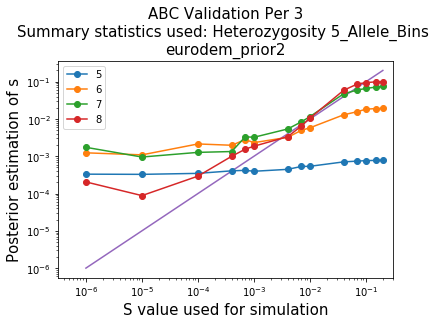

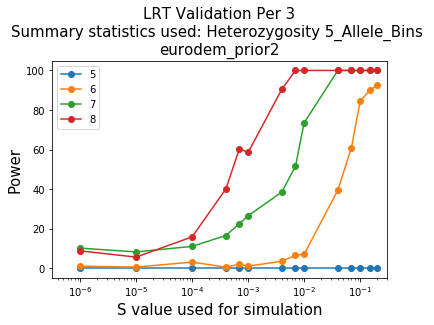

In [5]:
%%time
if __name__ == '__main__':
    main()